===Task===

Generate a 2 class data using sklearn, and use them on Gaussian Naive Classification. Put them into class and calculate accuracy accordingly.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


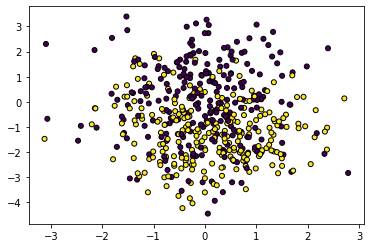

In [44]:
# generate quite a lot of noise
# with only 4 informative features out of 10
# with 2 redundant features, overlapping with that 4 informative features
# and 4 noisy features
# Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
class NaiveGaussian_Binary :
        
    def fit(self,X_train,y_train):
        n = X_train.shape[1]
        self.classes = np.unique(y_train)
        self.k = len(self.classes)
        mean = np.zeros((self.k,n)) 
        std = np.zeros((self.k,n))        
        
        for label in self.classes:
            mean[label,:] = X_train[y_train == label].mean(axis=0)
            std[label, :]  = X_train[y_train==label].std(axis=0)
        assert mean.shape == (self.k, X_train.shape[1])
        assert std.shape == (self.k, X_train.shape[1])
        self.mean = mean
        self.std = std
                
        # Calculate the prior p(y)
        m = {}
        sum_m = 0
        for label in self.classes:
            m[label] = len(X_train[y_train==label])
            sum_m += m[label]        
        
        
        self.priors = {}
        sum_priors = 0
        for label in self.classes:
            self.priors[label] = m[label] / sum_m
            sum_priors += self.priors[label]
            # print("p(y=0)|p(y=1")# {0: 167, 1: 183} )
        
        assert sum_priors == 1, "sum of probability must equal to 1"
        
    def predict(self, X_test):
        posteriors = np.zeros((X_test.shape[0], self.k))
        for i,label in enumerate(self.classes):
            likelihood = self.gaussian_pdf(X_test, self.mean[i, :], self.std[i, :])
            # px_y  = likelihood
            assert likelihood.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf!"
            total_likelihoods= np.prod(likelihood, axis=1)
            # posteriors p(y | x)  = likelihood p(x | y) * prior p(y) / P(x)
            posteriors[:,i]  = self.priors[label] * total_likelihoods
        yhat = np.argmax(posteriors, axis = 1)
        return yhat           
            

    def gaussian_pdf(self,X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def show_report(self,y_test,yhat):
        print("=========Average precision score=======")
        print(average_precision_score(y_test, yhat))
        print("=========Classification report=======")
        print("Report: ", classification_report(y_test, yhat))




In [50]:
from sklearn.metrics import average_precision_score, classification_report
NGB = NaiveGaussian_Binary()
NGB.fit(X_train, y_train)
yhat = NGB.predict(X_test)
NGB.show_report(y_test,yhat);

=========Average precision score=======
0.7861956260514299
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.82      0.85      0.83        74
           1       0.85      0.82      0.83        76

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [7]:
# prior $p(y)$
# class $p(x | y)$

posteriors p(y | x)  = p(x | y) * p(y) / P(x)

p(y) = 0 
p(y) = 1 

p(x | y)  
(also known as likelihoods or conditional probability)
# likelihood
gaussian_pdf(X_test, mean[0, :], std[0, :])
P(x|y=0)
P(x|y=1)



SyntaxError: invalid syntax (<ipython-input-7-d7fb397f6292>, line 1)